# Unit 12 - Tales from the Crypto

---


## 1. Sentiment Analysis

Use the [newsapi](https://newsapi.org/) to pull the latest news articles for Bitcoin and Ethereum and create a DataFrame of sentiment scores for each coin.

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [1]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
import nltk as nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
from newsapi import NewsApiClient

%matplotlib inline

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/coenemmenegger/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [2]:
# Read your api key environment variable
load_dotenv()
api_key = os.getenv("NEWS_API_KEY")

In [3]:
# Create a newsapi client
newsapi = NewsApiClient(api_key=api_key)

In [4]:
# Fetch the Bitcoin news articles
Bitcoin_headlines = newsapi.get_everything(
    q="Bitcoin",
    language="en",
    
)
# Print total articles
print(f"Total articles about Bitcoin: {Bitcoin_headlines['totalResults']}")

# Show sample article
Bitcoin_headlines["articles"][0]

Total articles about Bitcoin: 8514


{'source': {'id': None, 'name': 'New York Times'},
 'author': 'Jonah E. Bromwich',
 'title': 'Ex-Party Producer Charged in $2.7 Million Bitcoin-Laundering Scheme',
 'description': 'Thomas Spieker’s clients included dark-web drug dealers and a cellphone-hacking identity thief, prosecutors said.',
 'url': 'https://www.nytimes.com/2022/03/24/nyregion/thomas-spieker-bitcoin-scheme.html',
 'urlToImage': 'https://static01.nyt.com/images/2022/03/24/nyregion/24ny-bitcoin1/24ny-bitcoin1-facebookJumbo.jpg',
 'publishedAt': '2022-03-24T22:50:30Z',
 'content': 'Mr. Spiekers most prominent customer, whom he described as his whale client, was the Eastern European organized crime member, prosecutors said. Mr. Spieker laundered $620,000 for the client, they sai… [+2755 chars]'}

In [5]:
# Fetch the Ethereum news articles
Ethereum_headlines = newsapi.get_everything(
    q="Ethereum",
    language="en",
    
)
# Print total articles
print(f"Total articles about Ethereum: {Ethereum_headlines['totalResults']}")

# Show sample article
Ethereum_headlines["articles"][0]

Total articles about Ethereum: 4444


{'source': {'id': 'engadget', 'name': 'Engadget'},
 'author': 'Jon Fingas',
 'title': "Hackers swipe nearly $600 million from a 'play to earn' crypto game",
 'description': 'Digital thieves just pulled off another major crypto heist. Motherboard has learned hackers stole 173,600 Ethereum (about $591.2 million) from the Ronin blockchain that powers Axie Infinity, a popular "play to earn" game where players can receive crypto in ex…',
 'url': 'https://www.engadget.com/axie-infnity-ronin-network-crypto-theft-194014547.html',
 'urlToImage': 'https://s.yimg.com/os/creatr-uploaded-images/2022-03/6875e130-af90-11ec-ae65-a8e40222540c',
 'publishedAt': '2022-03-29T19:40:14Z',
 'content': 'Digital thieves just pulled off another major crypto heist. Motherboard has learned hackers stole 173,600 Ethereum (about $591.2 million) from the Ronin blockchain that powers Axie Infinity, a popula… [+1462 chars]'}

In [6]:
# Create the Bitcoin sentiment scores DataFrame
Bitcoin_sentiments = []

for article in Bitcoin_headlines["articles"]:
    try:
        text = article["content"]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        Bitcoin_sentiments.append({
            
            
            "Compound": compound,
            "Positive": pos,
            "Negative": neg,
            "Neutral": neu,
            "Text": text
            
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
Bitcoin_df = pd.DataFrame(Bitcoin_sentiments)

# Reorder DataFrame columns
cols = ["Compound", "Positive", "Negative", "Neutral","Text"]
Bitcoin_df = Bitcoin_df[cols]

Bitcoin_df.head()

,Compound,Positive,Negative,Neutral,Text
0,-0.2280,0.072,0.097,0.831,"Mr. Spiekers most prominent customer, whom he ..."
1,-0.1154,0.116,0.154,0.730,"Other fund vehicles hold crypto directly, but ..."
2,0.0000,0.000,0.000,1.000,"When Russia invaded Ukraine, Niki Proshin was ..."
3,0.4939,0.123,0.000,0.877,"SAN SALVADOR, March 23 (Reuters) - El Salvador..."
4,-0.7713,0.000,0.169,0.831,"""Bitcoin was seen by many of its libertarian-l..."


In [7]:
# Create the ethereum sentiment scores DataFrame
Ethereum_sentiments = []

for article in Ethereum_headlines["articles"]:
    try:
        text = article["content"]
        
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        Ethereum_sentiments.append({
            
            
            "Compound": compound,
            "Positive": pos,
            "Negative": neg,
            "Neutral": neu,
            "Text": text
            
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
Ethereum_df = pd.DataFrame(Ethereum_sentiments)

# Reorder DataFrame columns
cols = ["Compound", "Positive", "Negative", "Neutral","Text"]
Ethereum_df = Ethereum_df[cols]

Ethereum_df.head()

,Compound,Positive,Negative,Neutral,Text
0,-0.5106,0.000,0.102,0.898,Digital thieves just pulled off another major ...
1,-0.3182,0.059,0.093,0.848,"In February, shit hit the fan in the usual way..."
2,0.0000,0.000,0.000,1.000,His name is Vitalik Buterin and after dedicati...
3,-0.1326,0.000,0.044,0.956,"It seems that in 2022, you cant escape from th..."
4,0.8340,0.236,0.050,0.713,"If it sounds too good to be true, youre not wr..."


In [8]:
# Describe the Bitcoin Sentiment
Bitcoin_df.describe()

,Compound,Positive,Negative,Neutral
count,20.000000,20.000000,20.000000,20.000000
mean,0.098955,0.069750,0.046300,0.884050
std,0.391389,0.050606,0.061828,0.076087
min,-0.771300,0.000000,0.000000,0.730000
25%,-0.118550,0.036000,0.000000,0.848250
50%,0.152950,0.073000,0.019000,0.871000
75%,0.369700,0.102500,0.061750,0.937000
max,0.636900,0.171000,0.187000,1.000000


In [9]:
# Describe the Ethereum Sentiment
Ethereum_df.describe()

,Compound,Positive,Negative,Neutral
count,20.000000,20.000000,20.000000,20.000000
mean,0.226430,0.081350,0.019800,0.898800
std,0.407942,0.100696,0.033587,0.112368
min,-0.510600,0.000000,0.000000,0.682000
25%,0.000000,0.000000,0.000000,0.846500
50%,0.000000,0.029500,0.000000,0.920000
75%,0.528675,0.141500,0.045000,1.000000
max,0.867600,0.270000,0.102000,1.000000


### Questions:

Q: Which coin had the highest mean positive score?

A: Ethereum with 0.081350.

Q: Which coin had the highest compound score?

A: Ethereum at 0.8676.

Q. Which coin had the highest positive score?

A: Ethereum at 0.27.

---

## 2. Natural Language Processing
---
###   Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word.
2. Remove Punctuation.
3. Remove Stopwords.

In [10]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [11]:
# Instantiate the lemmatizer
lemmatizer = WordNetLemmatizer()

# Create a list of stopwords
stop_words = set(stopwords.words("english"))
#stop_words

# Expand the default stopwords list if necessary
stop_words_exp = {"today", "sent" ,"said" , "since", "announced", "country", "found", "not"}
sw = stop_words.union(stop_words_exp)

In [12]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    
    # Remove the punctuation from text
    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub('', text)
   
    # Create a tokenized list of the words
    words = word_tokenize(text)
    
    # Lemmatize words into root words
    lemm_words = [lemmatizer.lemmatize(word) for word in words]
   
    # Convert the words to lowercase
    lower_case = [word.lower() for word in lemm_words]
    
    # Remove the stop words
    tokens = [word for word in lower_case if word not in stop_words]
    
    return tokens

In [13]:
# Create a new tokens column for Bitcoin
Bitcoin_df["tokens"] = Bitcoin_df.Text.apply(tokenizer)
Bitcoin_df.head()

,Compound,Positive,Negative,Neutral,Text,tokens
0,-0.2280,0.072,0.097,0.831,"Mr. Spiekers most prominent customer, whom he ...","[mr., spiekers, prominent, customer, ,, descri..."
1,-0.1154,0.116,0.154,0.730,"Other fund vehicles hold crypto directly, but ...","[fund, vehicle, hold, crypto, directly, ,, the..."
2,0.0000,0.000,0.000,1.000,"When Russia invaded Ukraine, Niki Proshin was ...","[russia, invaded, ukraine, ,, niki, proshin, w..."
3,0.4939,0.123,0.000,0.877,"SAN SALVADOR, March 23 (Reuters) - El Salvador...","[san, salvador, ,, march, 23, (, reuters, ), -..."
4,-0.7713,0.000,0.169,0.831,"""Bitcoin was seen by many of its libertarian-l...","[``, bitcoin, wa, seen, many, libertarian-lean..."


In [14]:
# Create a new tokens column for ethereum
Ethereum_df["tokens"] = Ethereum_df.Text.apply(tokenizer)
Ethereum_df.head()

,Compound,Positive,Negative,Neutral,Text,tokens
0,-0.5106,0.000,0.102,0.898,Digital thieves just pulled off another major ...,"[digital, thief, pulled, another, major, crypt..."
1,-0.3182,0.059,0.093,0.848,"In February, shit hit the fan in the usual way...","[february, ,, shit, hit, fan, usual, way, :, o..."
2,0.0000,0.000,0.000,1.000,His name is Vitalik Buterin and after dedicati...,"[name, vitalik, buterin, dedicating, cover, re..."
3,-0.1326,0.000,0.044,0.956,"It seems that in 2022, you cant escape from th...","[seems, 2022, ,, cant, escape, metaverse, ., f..."
4,0.8340,0.236,0.050,0.713,"If it sounds too good to be true, youre not wr...","[sound, good, true, ,, youre, wrong, ., yield,..."


---

### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [15]:
from collections import Counter
from nltk import ngrams

In [16]:
#tokenized Bitcoin articles
bitcoin_p = tokenizer(Bitcoin_df.Text.str.cat())
bitcoin_p

['mr.',
 'spiekers',
 'prominent',
 'customer',
 ',',
 'described',
 'whale',
 'client',
 ',',
 'wa',
 'eastern',
 'european',
 'organized',
 'crime',
 'member',
 ',',
 'prosecutor',
 'said',
 '.',
 'mr.',
 'spieker',
 'laundered',
 '$',
 '620,000',
 'client',
 ',',
 'sai…',
 '[',
 '+2755',
 'char',
 ']',
 'fund',
 'vehicle',
 'hold',
 'crypto',
 'directly',
 ',',
 'theyre',
 'grappling',
 'different',
 'structural',
 'problem',
 'carry',
 'higher',
 'fee',
 ',',
 'drag',
 'return',
 '.',
 'grayscale',
 'bitcoin',
 'trust',
 ',',
 'largest',
 'bitcoin',
 'veh…',
 '[',
 '+2273',
 'char',
 ']',
 'russia',
 'invaded',
 'ukraine',
 ',',
 'niki',
 'proshin',
 'wa',
 'already',
 'year',
 'making',
 'living',
 'vlogger',
 '—',
 'youtube',
 'channel',
 ',',
 'tiktok',
 'channel',
 ',',
 'instagram',
 '.',
 'also',
 'ran',
 'online',
 'russian',
 'club',
 'a…',
 '[',
 '+5883',
 'char',
 ']',
 'san',
 'salvador',
 ',',
 'march',
 '23',
 '(',
 'reuters',
 ')',
 '-',
 'el',
 'salvador',
 'seeking'

In [17]:
#tokenized Ethereum articles
ethereum_p= tokenizer(Ethereum_df.Text.str.cat())
ethereum_p

['digital',
 'thief',
 'pulled',
 'another',
 'major',
 'crypto',
 'heist',
 '.',
 'motherboard',
 'ha',
 'learned',
 'hacker',
 'stole',
 '173,600',
 'ethereum',
 '(',
 '$',
 '591.2',
 'million',
 ')',
 'ronin',
 'blockchain',
 'power',
 'axie',
 'infinity',
 ',',
 'popula…',
 '[',
 '+1462',
 'char',
 ']',
 'february',
 ',',
 'shit',
 'hit',
 'fan',
 'usual',
 'way',
 ':',
 'old',
 'tweet',
 'resurfaced',
 '.',
 'brantly',
 'millegan',
 ',',
 'director',
 'operation',
 'ethereum',
 'name',
 'service',
 '(',
 'ens',
 ')',
 ',',
 'web3',
 'business',
 ',',
 'written',
 'following',
 'may',
 '201…',
 '[',
 '+3096',
 'char',
 ']',
 'name',
 'vitalik',
 'buterin',
 'dedicating',
 'cover',
 'recent',
 'edition',
 ',',
 'time',
 'ha',
 'named',
 'king',
 'cryptocurrencies',
 '.',
 'bloomberg',
 '|',
 'getty',
 'images',
 '28-year-old',
 'russian',
 '…',
 '[',
 '+2627',
 'char',
 ']',
 'seems',
 '2022',
 ',',
 'cant',
 'escape',
 'metaverse',
 '.',
 'facebook',
 'microsoft',
 ',',
 'seemingly

In [18]:
# Generate the Bitcoin N-grams where N=2

N=2
bigram_counts_B = Counter(ngrams(bitcoin_p, N))
print(dict(bigram_counts_B))

{('mr.', 'spiekers'): 1, ('spiekers', 'prominent'): 1, ('prominent', 'customer'): 1, ('customer', ','): 1, (',', 'described'): 1, ('described', 'whale'): 1, ('whale', 'client'): 1, ('client', ','): 2, (',', 'wa'): 1, ('wa', 'eastern'): 1, ('eastern', 'european'): 1, ('european', 'organized'): 1, ('organized', 'crime'): 1, ('crime', 'member'): 1, ('member', ','): 1, (',', 'prosecutor'): 1, ('prosecutor', 'said'): 1, ('said', '.'): 1, ('.', 'mr.'): 1, ('mr.', 'spieker'): 1, ('spieker', 'laundered'): 1, ('laundered', '$'): 1, ('$', '620,000'): 1, ('620,000', 'client'): 1, (',', 'sai…'): 1, ('sai…', '['): 1, ('[', '+2755'): 1, ('+2755', 'char'): 1, ('char', ']'): 20, (']', 'fund'): 1, ('fund', 'vehicle'): 1, ('vehicle', 'hold'): 1, ('hold', 'crypto'): 1, ('crypto', 'directly'): 1, ('directly', ','): 1, (',', 'theyre'): 1, ('theyre', 'grappling'): 1, ('grappling', 'different'): 1, ('different', 'structural'): 1, ('structural', 'problem'): 1, ('problem', 'carry'): 1, ('carry', 'higher'): 1, 

In [19]:
# Generate the Ethereum N-grams where N=2
N= 2
bigram_counts_E = Counter(ngrams(ethereum_p, N))
print(dict(bigram_counts_E))

{('digital', 'thief'): 1, ('thief', 'pulled'): 1, ('pulled', 'another'): 1, ('another', 'major'): 1, ('major', 'crypto'): 1, ('crypto', 'heist'): 1, ('heist', '.'): 1, ('.', 'motherboard'): 1, ('motherboard', 'ha'): 1, ('ha', 'learned'): 1, ('learned', 'hacker'): 1, ('hacker', 'stole'): 1, ('stole', '173,600'): 1, ('173,600', 'ethereum'): 1, ('ethereum', '('): 1, ('(', '$'): 1, ('$', '591.2'): 1, ('591.2', 'million'): 1, ('million', ')'): 1, (')', 'ronin'): 1, ('ronin', 'blockchain'): 1, ('blockchain', 'power'): 1, ('power', 'axie'): 1, ('axie', 'infinity'): 2, ('infinity', ','): 1, (',', 'popula…'): 1, ('popula…', '['): 1, ('[', '+1462'): 1, ('+1462', 'char'): 1, ('char', ']'): 20, (']', 'february'): 1, ('february', ','): 1, (',', 'shit'): 1, ('shit', 'hit'): 1, ('hit', 'fan'): 1, ('fan', 'usual'): 1, ('usual', 'way'): 1, ('way', ':'): 1, (':', 'old'): 1, ('old', 'tweet'): 1, ('tweet', 'resurfaced'): 1, ('resurfaced', '.'): 1, ('.', 'brantly'): 1, ('brantly', 'millegan'): 1, ('millega

In [20]:
# Function token_count generates the top 10 words for a given coin
def token_count(tokens, N=3):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [21]:
# Use token_count to get the top 10 words for Bitcoin
bitcoin_common= token_count(bitcoin_p, 10)
bitcoin_common

[(',', 42),
 ('[', 20),
 ('char', 20),
 (']', 20),
 ('.', 17),
 ('bitcoin', 16),
 ('(', 13),
 (')', 13),
 ('march', 12),
 ('reuters', 12)]

In [22]:
# Use token_count to get the top 10 words for Ethereum
ethereum_common= token_count(ethereum_p,10)
ethereum_common

[(',', 32),
 ('.', 23),
 ('[', 20),
 ('char', 20),
 (']', 20),
 ('$', 10),
 ('digital', 7),
 ('ha', 7),
 ('cryptocurrency', 7),
 ('(', 6)]

---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [23]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

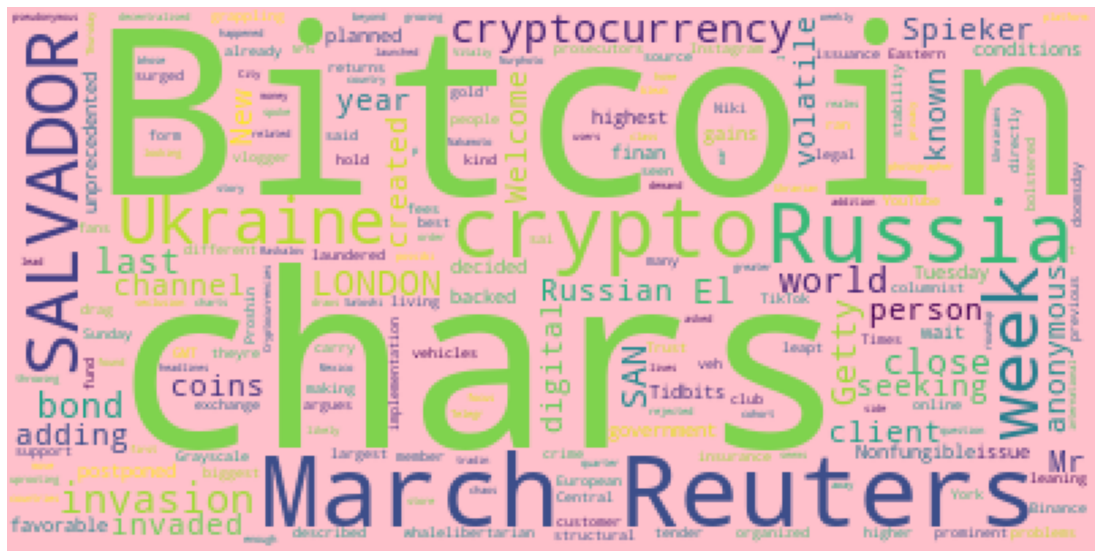

In [24]:
# Generate the Bitcoin word cloud
bitcoin_cloud = WordCloud(background_color='pink').generate(Bitcoin_df.Text.str.cat())
bitcoin_cloud
plt.axis("off")
plt.imshow(bitcoin_cloud)

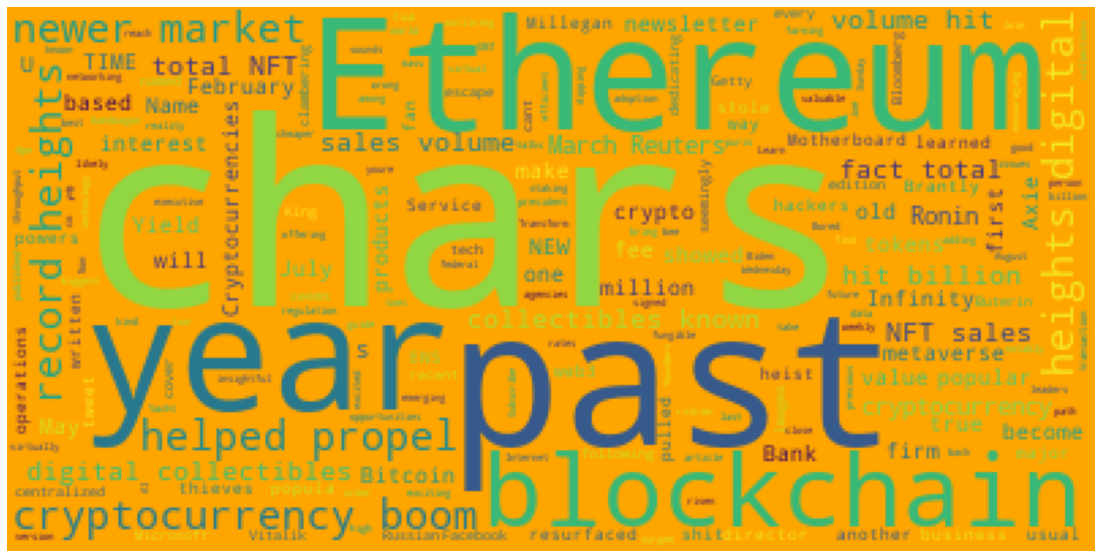

In [25]:
# Generate the Ethereum word cloud
ethereum_cloud = WordCloud(background_color='orange').generate(Ethereum_df.Text.str.cat())
ethereum_cloud
plt.axis("off")
plt.imshow(ethereum_cloud)

---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [26]:
import spacy
from spacy import displacy

In [27]:
# Download the language model for SpaCy
# !python -m spacy download en_core_web_sm

In [28]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

---
### Bitcoin NER

In [29]:
# Concatenate all of the Bitcoin text together
bitcoin_NER = Bitcoin_df["Text"].str.cat()

In [30]:
# Run the NER processor on all of the text
doc = nlp(bitcoin_NER)

# Add a title to the document
doc.user_data["title"]="BITCOIN NER"

In [31]:
# Render the visualization
displacy.render(doc, style='ent')

In [32]:
# List all Entities
for i in doc.ents:
    print(i.text, i.label_)

Spiekers PERSON
Eastern European NORP
Spieker PERSON
620,000 MONEY
Grayscale Bitcoin Trust ORG
Russia GPE
Ukraine GPE
Niki Proshin PERSON
a year DATE
YouTube ORG
TikTok ORG
Instagram ORG
Russian NORP
March 23 DATE
Reuters ORG
El Salvador GPE
Binance PERSON
Central ORG
the New York Times ORG
27 CARDINAL
Reuters ORG
4.41% PERCENT
46,499.29 MONEY
Sunday DATE
1,963.64 MONEY
Bitcoin PERSON
41.1% PERCENT
Reuters ORG
Russia GPE
Ukraine GPE
22 CARDINAL
Reuters ORG
Satoshi Nakamoto PERSON
2008 DATE
Nonfungible Tidbits PERSON
this week DATE
Russia GPE
Ukraine GPE
Ukrainians NORP
Russian NORP
+3275 ORG
this week DATE
Getty
Welcome to ORG
Nonfungible Tidbits PERSON
weekly DATE
this week DATE
Getty GPE
Russia GPE
last Thursday DATE
Ukranian NORP
Mexico City GPE
Telegr ORG
March 4 DATE
Reuters ORG
Russia GPE
Ukraine GPE
Russia GPE
March 22 DATE
Reuters ORG
El Salvador GPE
last week DATE
finan GPE
Reuters ORG
first quarter DATE
$2 trillion MONEY
chars]KENNERDELL ORG
Pa. GPE
March 21 DATE
Reuters ORG


---

### Ethereum NER

In [33]:
# Concatenate all of the Ethereum text together
ethereum_NER = Ethereum_df["Text"].str.cat()

In [34]:
# Run the NER processor on all of the text
doc = nlp(ethereum_NER)


# Add a title to the document
doc.user_data["title"]="ETHEREUM NER"

In [35]:
# Render the visualization
displacy.render(doc, style='ent')

In [36]:
# List all Entities
for i in doc.ents:
    print(i.text, i.label_)

Digital ORG
Motherboard PERSON
173,600 CARDINAL
Ethereum ORG
about $591.2 million MONEY
Ronin ORG
Axie Infinity GPE
February DATE
Ethereum Name Service ORG
ENS ORG
May 201 DATE
Vitalik Buterin PERSON
TIME ORG
Bloomberg GPE
Getty Images PERSON
28-year-old DATE
Russian NORP
2022 DATE
Facebook ORG
Microsoft ORG
Transform ORG
July 19 DATE
July 20 - August 3 DATE
6 MONEY
the last year DATE
Bored Ape Yacht Club ORG
one CARDINAL
Ethereum PERSON
the past few years DATE
NFT ORG
$23 billion MONEY
the past few years DATE
NFT ORG
$24 billion MONEY
Biden PERSON
Wednesday DATE
first ORDINAL
TIME ORG
weekly DATE
Reuters ORG
4.41% PERCENT
46,499.29 MONEY
Sunday DATE
1,963.64 MONEY
Bitcoin PERSON
41.1% PERCENT
the past few years DATE
NFT ORG
$23 billion MONEY
the past few years DATE
NFT ORG
$23 billion MONEY
Ethereum ORG
chars]NEW YORK GPE
March 21 DATE
Reuters ORG
a second straight week DATE
CoinShares ORG
Monday DATE
March 24 DATE
Reuters ORG
Leumi PERSON
first ORDINAL
Israeli NORP
Pepper Invest ORG


---